In [1]:
import DMN3 as DMN
from matplotlib import pyplot as plt
import numpy as np
from helperfuncs import *
import pandas as pd


In [2]:

def elasticity_matrix(E, nu):
    # plane strain elasticity matrix
    Ce = np.array([[1 - nu, nu, 0], [nu, 1 - nu, 0], [0, 0, (1 - 2 * nu)/2 ]])
    Ce *= E / ((1 - 2 * nu) * (1 + nu))

    return Ce

In [3]:
# node = DMN.Node(np.ones(6)*2)
# node.compliance
# node.rotated_compliance = node.compliance
# p1 = np.array([0.7243458035427647,-0.6624489424587073,0.0,0.7243458035427647,0.0,2.7735894920029462])
# p2 = np.array([0.36757546481294456,-0.16233746963686535,0.0,0.3675754648129446,0.0,1.05982586889962])

data = pd.read_csv("data/building_block_data.csv",header=None)
data = data.to_numpy()
# data[0]

# which = 230
# p1 = data[which][0:6]
# p2 = data[which][6:12]
# p3 = data[which][12:18]

p2 = convert_matrix(np.linalg.inv(elasticity_matrix(340*10**9,0.3)))*(10**9)
p1 = convert_matrix(np.linalg.inv(elasticity_matrix(500*10**9,0.3)))*(10**9)
# print(p1, p2)
# node.left = DMN.Node(p1)
# node.right = DMN.Node(p2)

# node.right.rotated_compliance = node.right.compliance
# node.left.rotated_compliance = node.left.compliance

# node.rotated_compliance = homogenise(node.left.rotated_compliance, node.right.rotated_compliance,0.2,0.8)

In [4]:
# node.delta_sigma = np.ones(3)*2


In [5]:
# node.right.delta_sigma

In [6]:
# node.left.delta_sigma

In [7]:
# DMN.calc_elasto_plastic_operator(node),convert_vectorised(node.rotated_compliance)

In [8]:
# res1 = np.ones((3,))* 2
# res2 = np.ones((3,))  * 4

In [9]:
# homogenise_res(node.left.rotated_compliance,node.right.rotated_compliance,0.5,0.5,res1,res2)

In [10]:
# Model = DMN.Tree(3)
# root = Model.initialise()

# Model.propagate_weights(root)
# Model.initialise_bottom_layer(root,p1,p2)


In [11]:
# Model.homogenise_system_res(root)


In [12]:
# root.res_strain,root.delta_eps

In [13]:
# root.sigma = np.array([1,2,3])
# Model.backwards_pass(root)

In [14]:
# bottom_node = Model.fetch_node(root,3,6)

In [15]:
# bottom_node.delta_sigma,bottom_node.delta_eps


# DMN.return_mapping(root)

In [16]:
# from DMN3 import xi,evaluate_plastic_state

# # def xi(node,delta_gamma):
# #     D = convert_vectorised(node.rotated_compliance)
# #     A = np.linalg.inv(D + delta_gamma *P)@ D
# #     sigma = node.sigma
    
# #     return sigma.T @A.T@P@A@sigma
    
# def xi_prime_finite_diff(node,delta_gamma,delta=1e-6,sigma_trial=np.zeros((3,))):
   
#     return (xi(node,delta_gamma + delta,sigma_trial) - xi(node,delta_gamma - delta,sigma_trial))/(2*delta)

# def xi_prime_ana(node,delta_gamma,sigma_trial=np.zeros((3,))):
#     D = convert_vectorised(node.rotated_compliance)
#     C = np.linalg.inv(D)
#     A = np.linalg.inv(D + delta_gamma *P)@ D
    
#     middle_mat = P.T @C.T@ A.T + P@A@C


#     return -sigma_trial.T@A.T@middle_mat@P@A@sigma_trial


In [17]:
# import timeit

# gamma = .23123
# deltas = np.logspace(-10,-3,100)
# res = np.zeros_like(deltas)


# sigma_trial = np.array([1,2,3])
# for index,delta in enumerate(deltas):
#     res[index] = abs(xi_prime_finite_diff(root,gamma,delta,sigma_trial)-xi_prime_ana(root,gamma,sigma_trial))/abs(xi_prime_ana(root,gamma,sigma_trial))

# plt.plot(deltas,res,marker='o',label='Finite Difference')
# plt.xscale('log')
# plt.yscale('log')


# t1 = timeit.timeit(lambda: xi_prime_finite_diff(root,gamma,1e-6))
# t2 = timeit.timeit(lambda: xi_prime_ana(root,gamma))


In [18]:
# t1, t2

In [19]:
# D = convert_vectorised(node.rotated_compliance)
# delta_gamma= evaluate_plastic_state(root,np.array([0,0,0.3]))
# A = np.linalg.inv(D + delta_gamma *P)@ D
# A@np.array([0,0,0.3])

In [20]:
loading_path = np.linspace(0,0.01,500)
Model = DMN.Tree(4)

metadata,training_error,validation_error,root = DMN.load_model('models/model_N=4.pkl')

# root = Model.initialise(num_loading_steps=len(loading_path))

Model.propagate_weights(root)
Model.initialise_bottom_layer(root,p1,p2)
# print(loading_path)
Model.FeedForward(root,p1,p2)
Model.plasticity_loader(root,loading_path)



phi 3.023059233497882e-14
phi 3.1042009240866975e-14
phi 5.778746098826504e-09
phi 3.117905239546914e-14
phi 9.860516026090338e-09
phi 6.929575675426736e-09
phi 8.945474092372785e-11
phi 9.845639928340866e-14
phi 1.4151939169149141e-12
phi 1.1266833820078315e-12
phi 1.9035749539153546e-12
phi 1.7483566677745088e-12
phi 1.816703471685388e-12
phi 2.2797345608505104e-13
phi 1.6823666591780917e-11
phi 8.024332066869366e-13
phi 4.008580735143791e-09
phi 3.4448312258295033e-13
phi 2.8883936267071197e-09
phi 2.0291680662143374e-12
phi 8.445204678804441e-10
phi 4.420128759535791e-12
phi 5.916014206297504e-14
phi 1.1280386347234383e-13
phi 1.2962468771970936e-11
phi 1.709953012518639e-11
phi 6.027437663563839e-12
phi 1.517116467175672e-11
phi 1.6510323490315226e-11
phi 1.638054058714089e-11
phi 1.4804668341944494e-11
phi 2.4971014839225703e-11
phi 5.612069238145057e-10
phi 5.629229313589001e-10
phi 6.388379408805989e-14
phi 5.149988872854561e-10
phi 7.784340923591704e-11
phi 5.63318768801585e-1

In [21]:
# Model.FeedForward(root,p1,p2)
print((convert_vectorised(root.rotated_compliance)))
print('original',convert_vectorised(p1))
final_stress= np.linalg.inv(convert_vectorised(root.rotated_compliance)) @ root.epss[-1]

print("Final stress:",final_stress)



[[ 0.21375879 -0.15484677  0.00101956]
 [-0.15484677  0.15424249 -0.00116372]
 [ 0.00101956 -0.00116372  0.12742947]]
original [[ 0.00182 -0.00078  0.     ]
 [-0.00078  0.00182  0.     ]
 [ 0.       0.       0.0052 ]]
Final stress: [0.17151129 0.17218473 0.00020018]


Text(0, 0.5, '$\\sigma_1$ (GPa)')

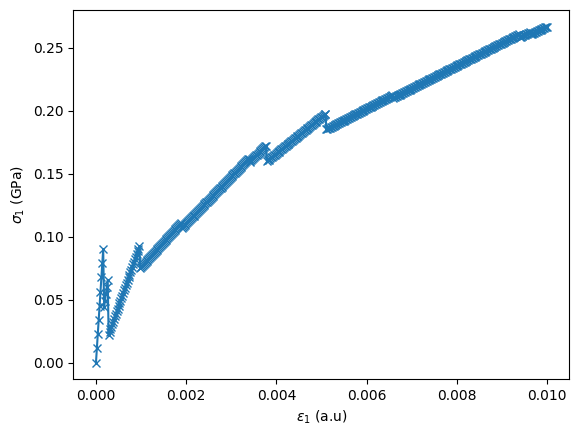

In [22]:
bottom_node = Model.fetch_node(root,3,31)


plt.plot(root.epss[:,0],root.sigmas[:,0],label='sigma_1',marker = 'x')
plt.xlabel(r'$\epsilon_1$ (a.u)')
plt.ylabel(r'$\sigma_1$ (GPa)')


In [23]:
bottom_node = Model.fetch_node(root,3,6)

root.delta_sigma,root.res_strain
bottom_node.

SyntaxError: invalid syntax (3658926097.py, line 4)

In [ ]:
for i in range(1,9):
    bottom_node = Model.fetch_node(root,4,i)
    print(bottom_node.activation)
   

1.0851128140139592
1.3836760374014487
0.5329519325673803
-0.017034882861879312
0.5832179726454294
0.6833096976146252
-0.004292350948189287
0.05585203527247442
